In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Pandas 绘图

In [2]:
# 可用绘图样式
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [3]:
# 设置绘图样式
plt.style.use('seaborn-colorblind')

## DataFrame 绘图

In [4]:
np.random.seed(100)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                  'B': np.random.randn(365).cumsum(0) + 20,
                  'C': np.random.randn(365).cumsum(0) - 20},
                 index=pd.date_range('2017/1/1', periods=365))
df.head()

,A,B,C
2017-01-01,-1.749765,21.091816,-19.638975
2017-01-02,-1.407085,20.686733,-17.061997
2017-01-03,-0.254049,21.223177,-15.474676
2017-01-04,-0.506485,19.091862,-14.786998
2017-01-05,0.474835,19.354939,-14.805210


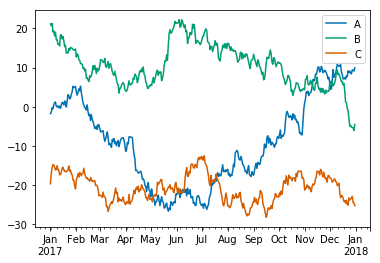

In [5]:
df.plot()

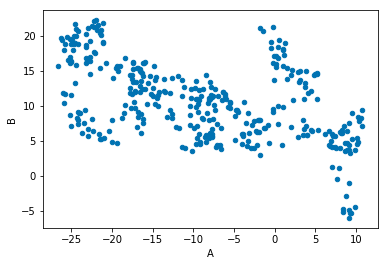

In [6]:
df.plot('A', 'B', kind='scatter')

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


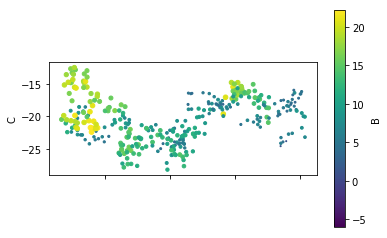

In [31]:
# 颜色(c)和大小(s)有'B'列的数据决定
ax = df.plot('A', 'C', kind='scatter', c='B', s=df['B'], colormap='viridis')

# 设置坐标为相同比例
ax.set_aspect('equal')

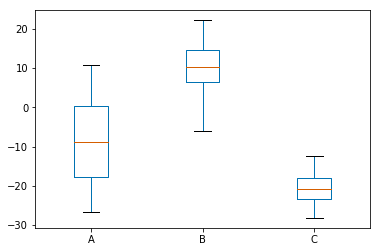

In [9]:
df.plot(kind='box')

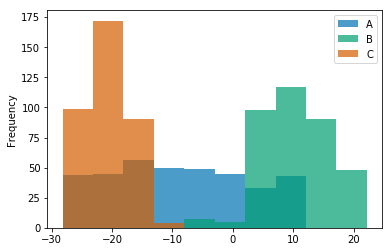

In [10]:
df.plot(kind='hist', alpha=0.7)

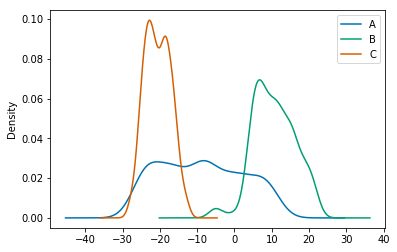

In [11]:
df.plot(kind='kde')

### pandas.tools.plotting

In [12]:
iris = pd.read_csv('./iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169691A3CF8>,
      dtype=object)

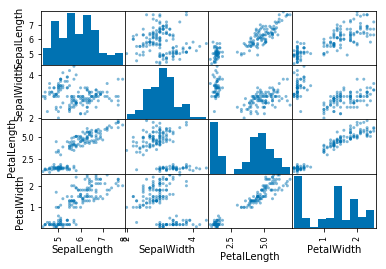

In [13]:
# 查看变量间的关系
pd.plotting.scatter_matrix(iris)

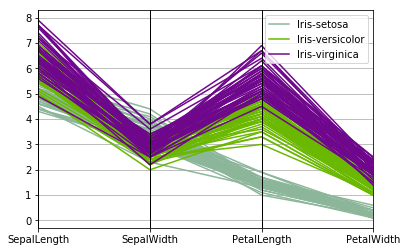

In [14]:
# 查看多变量分布
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name')

## Seaborn 绘图

In [15]:
import seaborn as sns

In [16]:
np.random.seed(100)
v1 = pd.Series(np.random.normal(0, 10, 1000), name='v1')
v2 = pd.Series(2 * v1 + np.random.normal(60, 15, 1000), name='v2')

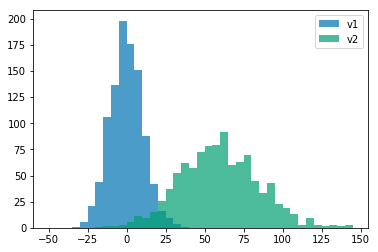

In [17]:
# 通过 matplotlib 绘图
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50, 150, 5), label='v1')
plt.hist(v2, alpha=0.7, bins=np.arange(-50, 150, 5), label='v2')
plt.legend()

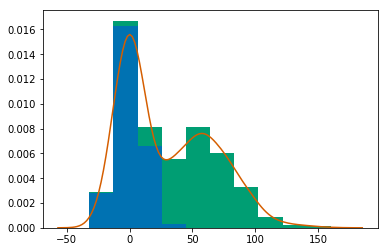

In [18]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True)
v3 = np.concatenate((v1, v2))
sns.kdeplot(v3)

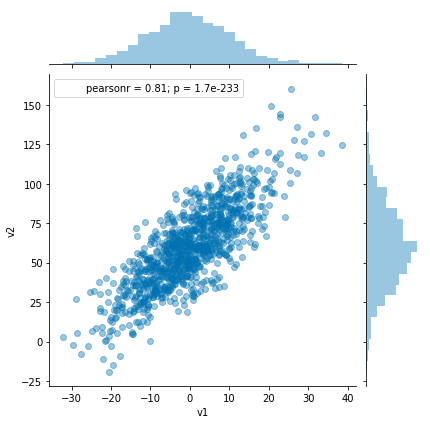

In [19]:
# 使用 Seaborn 绘图
plt.figure()
sns.jointplot(v1, v2, alpha=0.4)

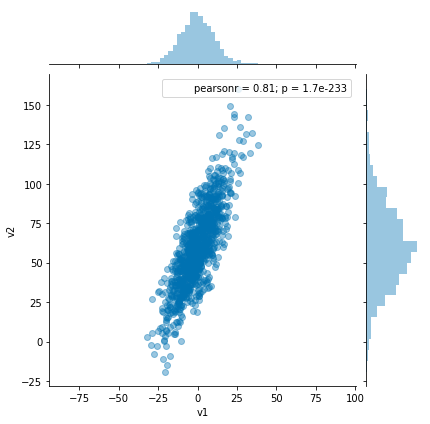

In [20]:
# 使用 Seaborn 绘图
plt.figure()
grid = sns.jointplot(v1, v2, alpha=0.4)
grid.ax_joint.set_aspect('equal')

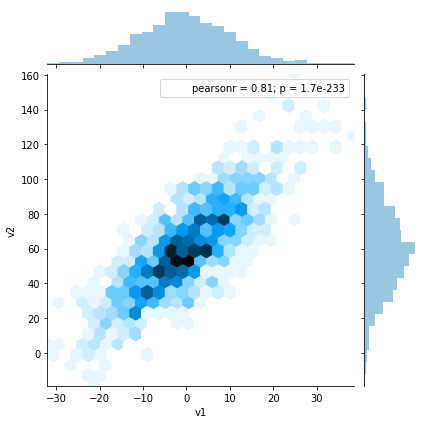

In [21]:
plt.figure()
sns.jointplot(v1, v2, kind='hex')

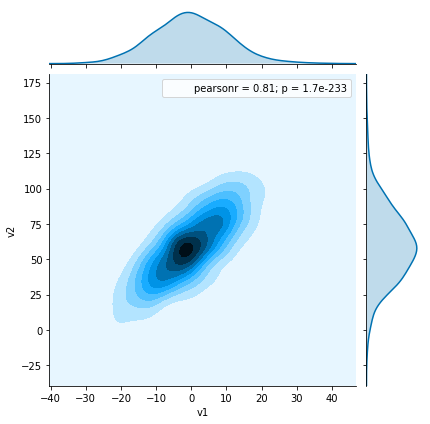

In [22]:
plt.figure()
sns.jointplot(v1, v2, kind='kde')

In [23]:
iris = pd.read_csv('./iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


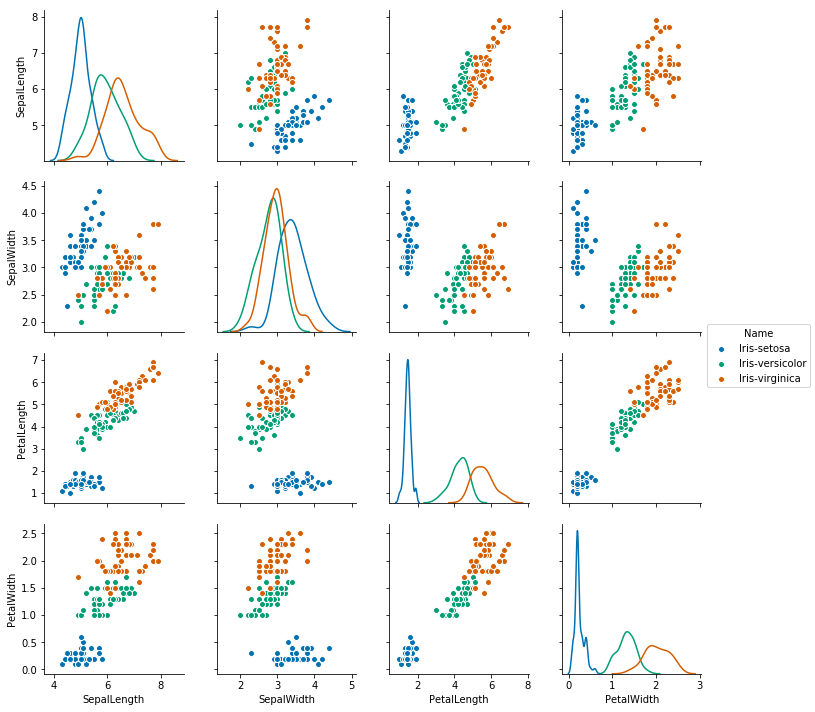

In [25]:
sns.pairplot(iris, hue='Name', diag_kind='kde')

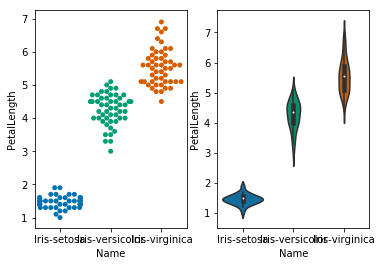

In [26]:
plt.figure()
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris)
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris)